<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Initial-Setup-and-Data-Cleaning" data-toc-modified-id="Initial-Setup-and-Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Setup and Data Cleaning</a></span></li><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Univariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Categorical-Variables-(Barplots)" data-toc-modified-id="Categorical-Variables-(Barplots)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorical Variables (Barplots)</a></span></li><li><span><a href="#Continuous-Variables-(Histograms)" data-toc-modified-id="Continuous-Variables-(Histograms)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Continuous Variables (Histograms)</a></span></li><li><span><a href="#Dataset-Cleaning-after-Drawing-Inferences" data-toc-modified-id="Dataset-Cleaning-after-Drawing-Inferences-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Dataset Cleaning after Drawing Inferences</a></span><ul class="toc-item"><li><span><a href="#Numerical-Variables" data-toc-modified-id="Numerical-Variables-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Numerical Variables</a></span></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Categorical Variables</a></span></li><li><span><a href="#High-Proportion-of-Values-Missing" data-toc-modified-id="High-Proportion-of-Values-Missing-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>High Proportion of Values Missing</a></span></li></ul></li></ul></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bivariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Numerical-Numerical-Relationship" data-toc-modified-id="Numerical-Numerical-Relationship-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Numerical-Numerical Relationship</a></span></li><li><span><a href="#Categorical-Numerical-Relationship" data-toc-modified-id="Categorical-Numerical-Relationship-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Categorical-Numerical Relationship</a></span></li><li><span><a href="#Pivot-Tables" data-toc-modified-id="Pivot-Tables-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Pivot Tables</a></span></li></ul></li><li><span><a href="#Storing-Final-Dataframe" data-toc-modified-id="Storing-Final-Dataframe-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Storing Final Dataframe</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Next Steps</a></span></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Word Cloud</a></span></li></ul></div>

# Objectives

 The objectives of this notebook, in sequential order, are:
 
 1. __to perform preliminary data cleaning to make it suitable for exploratory data analysis (EDA).__
 2. __to perform univariate analysis on numerical and categorical variables to identify outliers and remove them.__ 
 3. __to perform bivariate analysis to shortlist variables that will be used in machine learning model building to predict monthly rent.__
 4. __saving the cleaned file on which model building will be done.__ 
 5. __to generate WordCloud summary to understand the written description given in listings on RentFaster.ca.__
 

For this notebook, the raw data will be the one on which data cleaning was done after scrapping (<a href="https://github.com/RahulNagial/Regression_Analysis" target="_blank">refer .ipynb file titled "Data_Cleaning_and_Introductory_EDA"</a>). The broad aim of the present notebook is to get a better understanding of the trends in data. 

# Initial Setup and Data Cleaning

First, I import all the required libraries and set the general notebook settings.

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# displaying all the columns and row throughout the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# turning off warnings for the notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# for Word Cloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

Then I import the data obtained after initial data cleaning (<a href="https://github.com/RahulNagial/Regression_Analysis" target="_blank">refer "rentfaster_scraped_data_cleaned.csv"</a>). I make a working copy of the data and store it in data frame df.  

In [5]:
df_rentfaster = pd.read_csv("rentfaster_scraped_data_cleaned.csv")
df = df_rentfaster.copy()

Checking the first 20 rows.

In [6]:
df.iloc[:20]

,Old_Index,Listings_Title,Neighbourhood,Fulldescription,Listing_ID,Pets,Smoking,Tenant_Parking,Year_Built,Landlord_On_Rentfaster_Since,Building_features,Property_features,Community_features,Utilities_info,Listing_Type,Sq_Feet,Furnishing,Baths,Beds,Rent_Monthly
0,0,VISTA PHASE 1,Skyview,Join Us for Our Virtual Open House on Monday a...,430647,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,873,0,1.0,2,1433
1,0,VISTA PHASE 1,Skyview,Join Us for Our Virtual Open House on Monday a...,430647,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,1015,0,2.0,2,1499
2,0,VISTA PHASE 1,Skyview,Join Us for Our Virtual Open House on Monday a...,430647,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,946,0,2.0,1,1348
3,0,VISTA PHASE 1,Skyview,Join Us for Our Virtual Open House on Monday a...,430647,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,878,0,1.0,2,1435
4,1,LARGE 2 BEDROOMS WITH DEN CONDO AT TARALAKE WA...,Taradale,Large 2 bedroom condo with den ideal for small...,124512,0,0,1,2013,2010,2.0,14.0,18.0,3.0,Condo,960,0,2.0,2,1350
5,2,COZY 2 BEDROOM COTTAGE HOUSE WITH HUGE FENCED ...,West Hillhurst,Entire Cozy 2 Bedroom Cottage Bungalow in West...,437801,0,0,0,1947,2006,0.0,19.0,21.0,-1.0,House,800,0,1.0,2,1750
6,3,VARSITY TOWERS NORTH WEST,Varsity,Luxurious condo living in 8 story concrete bui...,407306,0,0,0,1975,2010,22.0,15.0,21.0,-1.0,Condo,1100,1,1.5,1,1500
7,4,VISTA PHASE 2,Skyview,Join Us for Our Virtual Open House on Monday a...,430648,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,678,0,1.0,1,1199
8,4,VISTA PHASE 2,Skyview,Join Us for Our Virtual Open House on Monday a...,430648,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,981,0,2.0,2,1350
9,4,VISTA PHASE 2,Skyview,Join Us for Our Virtual Open House on Monday a...,430648,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,676,0,1.0,1,1222


A few columns need further cleaning before meaningful inferences can be drawn from them.

In [7]:
df['Landlord_On_Rentfaster_Since'].value_counts()

-1       848
 2020    123
 2017    102
 2019     77
 2009     77
 2015     64
 2018     61
 2014     59
 2016     52
 2005     42
 2008     35
 2006     35
 2007     33
 2010     31
 2011     30
 2013     28
 2012     21
Name: Landlord_On_Rentfaster_Since, dtype: int64

I converted the entries of above column to number of years landlord has been on rentfaster since that is more insightful than absolute year (like 2012)

In [8]:
df['Landlord_On_Rentfaster_For'] = df['Landlord_On_Rentfaster_Since'].apply(lambda x: 2021 - x if x != -1 else -1)

Doing similar transformation to the column below.

In [9]:
df['Year_Built'].value_counts()
# again given for around half so can't drop straightaway

-1       977
 2019     83
 2016     80
 2020     73
 2017     69
 2015     38
 2021     30
 2018     21
 2008     21
 2010     20
 2007     15
 2002     14
 2005     13
 2014     11
 2013     11
 1991     11
 1980     11
 2001     10
 2003     10
 1985     10
 2004      9
 2011      8
 2006      8
 1970      8
 1972      8
 2012      8
 2000      7
 2009      7
 1910      6
 1962      6
 1976      6
 1978      6
 1975      6
 1998      6
 1969      4
 1981      4
 1999      4
 1979      4
 1996      4
 1965      4
 1967      3
 1911      3
 1912      3
 1950      3
 1954      3
 1960      3
 1982      3
 1983      3
 1995      3
 1992      3
 1971      3
 1988      3
 1990      3
 1973      3
 1974      3
 1977      3
 1947      2
 1949      2
 1968      2
 1953      2
 1997      2
 1957      2
 1958      2
 1963      2
 1964      2
 1984      1
Name: Year_Built, dtype: int64

In [10]:
df['Years_Built_For'] = df['Year_Built'].apply(lambda x: 2021 - x if x != -1 else -1)

Now the dataframe looks good except listing title and full description columns.

In [11]:
df.iloc[:20]

,Old_Index,Listings_Title,Neighbourhood,Fulldescription,Listing_ID,Pets,Smoking,Tenant_Parking,Year_Built,Landlord_On_Rentfaster_Since,Building_features,Property_features,Community_features,Utilities_info,Listing_Type,Sq_Feet,Furnishing,Baths,Beds,Rent_Monthly,Landlord_On_Rentfaster_For,Years_Built_For
0,0,VISTA PHASE 1,Skyview,Join Us for Our Virtual Open House on Monday a...,430647,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,873,0,1.0,2,1433,-1,-1
1,0,VISTA PHASE 1,Skyview,Join Us for Our Virtual Open House on Monday a...,430647,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,1015,0,2.0,2,1499,-1,-1
2,0,VISTA PHASE 1,Skyview,Join Us for Our Virtual Open House on Monday a...,430647,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,946,0,2.0,1,1348,-1,-1
3,0,VISTA PHASE 1,Skyview,Join Us for Our Virtual Open House on Monday a...,430647,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,878,0,1.0,2,1435,-1,-1
4,1,LARGE 2 BEDROOMS WITH DEN CONDO AT TARALAKE WA...,Taradale,Large 2 bedroom condo with den ideal for small...,124512,0,0,1,2013,2010,2.0,14.0,18.0,3.0,Condo,960,0,2.0,2,1350,11,8
5,2,COZY 2 BEDROOM COTTAGE HOUSE WITH HUGE FENCED ...,West Hillhurst,Entire Cozy 2 Bedroom Cottage Bungalow in West...,437801,0,0,0,1947,2006,0.0,19.0,21.0,-1.0,House,800,0,1.0,2,1750,15,74
6,3,VARSITY TOWERS NORTH WEST,Varsity,Luxurious condo living in 8 story concrete bui...,407306,0,0,0,1975,2010,22.0,15.0,21.0,-1.0,Condo,1100,1,1.5,1,1500,11,46
7,4,VISTA PHASE 2,Skyview,Join Us for Our Virtual Open House on Monday a...,430648,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,678,0,1.0,1,1199,-1,-1
8,4,VISTA PHASE 2,Skyview,Join Us for Our Virtual Open House on Monday a...,430648,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,981,0,2.0,2,1350,-1,-1
9,4,VISTA PHASE 2,Skyview,Join Us for Our Virtual Open House on Monday a...,430648,1,0,1,-1,-1,2.0,7.0,9.0,2.0,Apartment,676,0,1.0,1,1222,-1,-1


At this stage, I do not intend to use Natural Language Processing (NLP) to gain insights into textual data. Therefore, I store the title and full description in *df_written* dataframe.

In [12]:
df_written = df[['Listings_Title', 'Fulldescription']]

As a suggestion for future improvements in this project, NLP can be used to gain insights from the textual data. For the present analysis, I only stored information regarding the length of the field. The idea is that maybe people putting expensive listings tend to write more about its features and therefore post longer adds. Thus, length of field can be a good predicter for monthly rent.

In [13]:
df['Fulldescription_len'] = df['Fulldescription'].apply(lambda x: len(str(x)))

In [14]:
df['Listings_Title_len'] = df['Listings_Title'].apply(lambda x: len(str(x)))

I drop all the columns which would not be used further in exploratory data analysis.

In [15]:
df.drop(['Listings_Title', 'Fulldescription', 'Year_Built', 'Landlord_On_Rentfaster_Since', 'Old_Index', 'Listing_ID'], axis=1, inplace=True)

Everything looks good to go.

In [16]:
df[:20]

,Neighbourhood,Pets,Smoking,Tenant_Parking,Building_features,Property_features,Community_features,Utilities_info,Listing_Type,Sq_Feet,Furnishing,Baths,Beds,Rent_Monthly,Landlord_On_Rentfaster_For,Years_Built_For,Fulldescription_len,Listings_Title_len
0,Skyview,1,0,1,2.0,7.0,9.0,2.0,Apartment,873,0,1.0,2,1433,-1,-1,1019,13
1,Skyview,1,0,1,2.0,7.0,9.0,2.0,Apartment,1015,0,2.0,2,1499,-1,-1,1019,13
2,Skyview,1,0,1,2.0,7.0,9.0,2.0,Apartment,946,0,2.0,1,1348,-1,-1,1019,13
3,Skyview,1,0,1,2.0,7.0,9.0,2.0,Apartment,878,0,1.0,2,1435,-1,-1,1019,13
4,Taradale,0,0,1,2.0,14.0,18.0,3.0,Condo,960,0,2.0,2,1350,11,8,315,78
5,West Hillhurst,0,0,0,0.0,19.0,21.0,-1.0,House,800,0,1.0,2,1750,15,74,1210,57
6,Varsity,0,0,0,22.0,15.0,21.0,-1.0,Condo,1100,1,1.5,1,1500,11,46,784,25
7,Skyview,1,0,1,2.0,7.0,9.0,2.0,Apartment,678,0,1.0,1,1199,-1,-1,985,13
8,Skyview,1,0,1,2.0,7.0,9.0,2.0,Apartment,981,0,2.0,2,1350,-1,-1,985,13
9,Skyview,1,0,1,2.0,7.0,9.0,2.0,Apartment,676,0,1.0,1,1222,-1,-1,985,13


I used .describe() to get a summary overview of the numerical variables in the data.

In [17]:
df.describe()

,Pets,Smoking,Tenant_Parking,Building_features,Property_features,Community_features,Utilities_info,Sq_Feet,Furnishing,Baths,Beds,Rent_Monthly,Landlord_On_Rentfaster_For,Years_Built_For,Fulldescription_len,Listings_Title_len
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,0.501746,0.087893,0.555297,3.465076,10.085565,16.759022,1.751455,6.972819e+03,0.074505,1.228754,1.660070,1407.528522,3.008731,6.479627,1468.511641,43.229336
std,0.500143,0.306908,0.497078,4.600107,5.347909,4.488530,1.530675,2.622846e+05,0.387984,0.726044,0.979546,674.964694,5.217733,16.387929,973.594315,21.136956
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,3.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,15.000000,2.000000,-1.000000e+00,0.000000,1.000000,1.000000,1075.000000,-1.000000,-1.000000,682.750000,25.000000
50%,1.000000,0.000000,1.000000,2.000000,10.000000,18.000000,2.000000,6.700000e+02,0.000000,1.000000,2.000000,1295.000000,1.000000,-1.000000,1246.500000,44.000000
75%,1.000000,0.000000,1.000000,5.000000,13.000000,19.000000,2.000000,9.130000e+02,0.000000,1.500000,2.000000,1558.500000,6.000000,5.000000,2012.000000,60.000000
max,1.000000,1.000000,1.000000,28.000000,35.000000,24.000000,5.000000,1.087199e+07,1.000000,6.000000,6.000000,12750.000000,16.000000,111.000000,5867.000000,80.000000


Getting more information regarding dataframe using .info() .

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Neighbourhood               1718 non-null   object 
 1   Pets                        1718 non-null   int64  
 2   Smoking                     1718 non-null   int64  
 3   Tenant_Parking              1718 non-null   int64  
 4   Building_features           1718 non-null   float64
 5   Property_features           1718 non-null   float64
 6   Community_features          1718 non-null   float64
 7   Utilities_info              1718 non-null   float64
 8   Listing_Type                1718 non-null   object 
 9   Sq_Feet                     1718 non-null   int64  
 10  Furnishing                  1718 non-null   int64  
 11  Baths                       1718 non-null   float64
 12  Beds                        1718 non-null   int64  
 13  Rent_Monthly                1718 

# Univariate Analysis

I start analyzing the variables in a univariate fashion. The idea is to first see the distribution of variables themselves. There are broadly 2 types of variables, categorical and numerical. First, I analyse the distribution of categorical variables with the help of barplots. Then I see the distribution of numerical data with the help of histograms. Based on the insights gained from barplots and histograms, I clean the dataset and explore it in more depth in the upcoming sections.

## Categorical Variables (Barplots)

I define a *Display_Barplot* function which generates barplots in a proper format. This function takes the desired size of output figure with *(Length, Height)*. It can also display the most common variable types only by taking inputs with *(Start, End)*. For example for neighbourhood variable below, I plot between the most common and 24th most common type since *(Start, End)* is (0,25).  

In [19]:
def Display_Barplot(Column, Length, Height, Start, End, Name):
    
    font = {'fontname':'Arial'}
    if ((Start!=0) or (End!=0)):
        cat_num = Column.value_counts()[Start:End]
        fig_dims = (Length, Height)
        fig, ax = plt.subplots(figsize=fig_dims)
        ax.margins(x=1, y=0.01)
        chart = sns.barplot(x=cat_num.index, y=cat_num, ax=ax, data=df)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize=12, **font)
        chart.set_xlabel(Name,fontsize=14, **font, fontweight='bold')
        chart.set_ylabel('Frequency',fontsize=14, **font, fontweight='bold')
        plt.xticks(fontsize = 12, **font)
        plt.yticks(fontsize = 12, **font)
        
        return plt.show()    

    cat_num = Column.value_counts()
    fig_dims = (Length, Height)
    fig, ax = plt.subplots(figsize=fig_dims, tight_layout=True)
    ax.margins(x=1, y=0.01)
    chart = sns.barplot(x=cat_num.index, y=cat_num, ax=ax, data=df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.set_xlabel(Name,fontsize=14, **font, fontweight='bold')
    chart.set_ylabel('Frequency',fontsize=14, **font, fontweight='bold')
    plt.xticks(fontsize = 12, **font)
    plt.yticks(fontsize = 12, **font)
    
    return plt.show()    

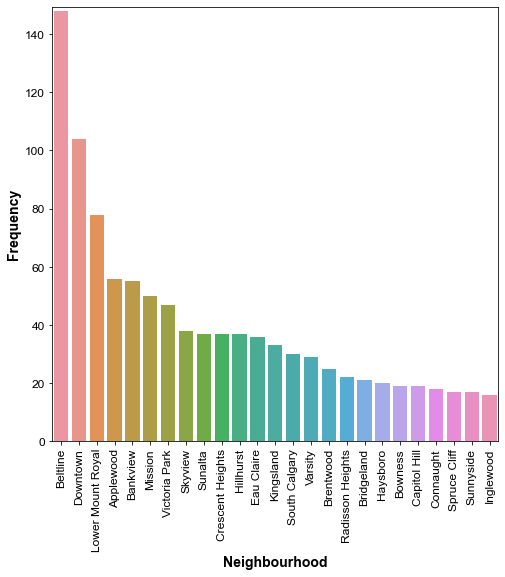

In [20]:
Display_Barplot(df['Neighbourhood'], 8, 8, 0, 25, 'Neighbourhood')

We can see that most of the listings are close to downtown. For example, neighbourhoods like Beltline, Victoria Park, Sunalta, Eau Claire etc. are in proximity of downtown. This inference make sense since in reality also most of the listings are in downtown, which is the center of all activity in city. Another notable thing is that neighbourhoods like Brentwood and Varsity, which are close to universities and colleges also have a lot of listings, which would be targeted for students.

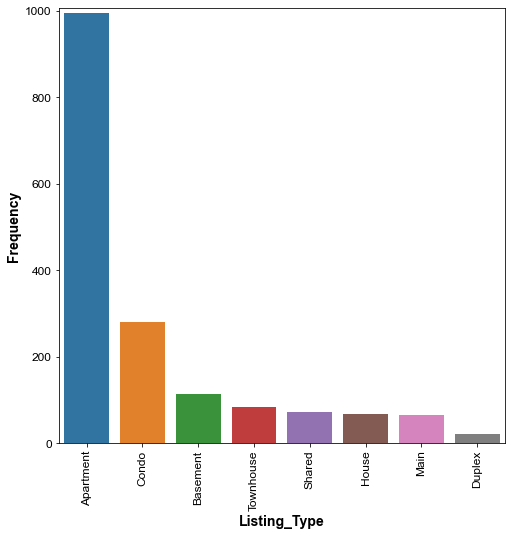

In [21]:
Display_Barplot(df['Listing_Type'], 8, 8, 0, 8, 'Listing_Type')

The space in downtown is limited and expensive. Therefore, there are mostly high rise buildings in downtown. Hence, most of the listings in Calgary are apartments. 

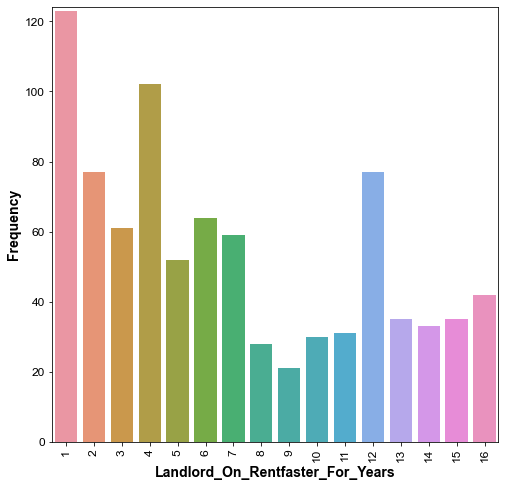

In [22]:
Display_Barplot(df['Landlord_On_Rentfaster_For'], 8, 8, 1, len(
    df['Landlord_On_Rentfaster_For']), 'Landlord_On_Rentfaster_For_Years')

Most of the landlords on RentFaster have started using the site recently. This could be explained by the fact that there are many young, tech savy landlords who want to leverage technology to get best deal. Another point to note is that there are many landlords using the website for 10+ years and this shows a loyal and satisfied customer base.

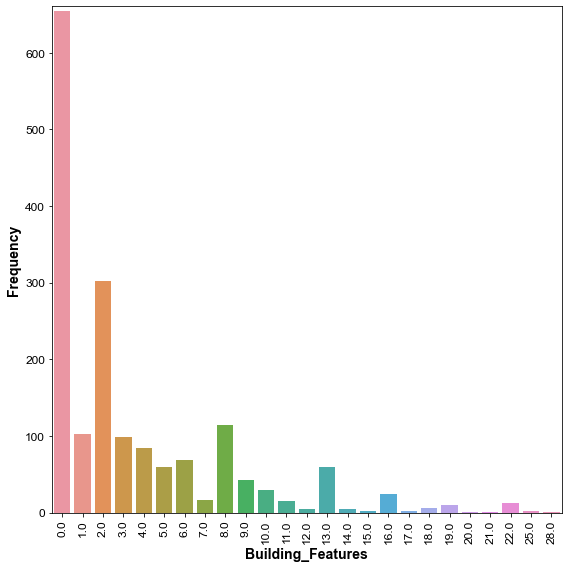

In [23]:
Display_Barplot(df['Building_features'], 8, 8, 0, 0, 'Building_Features')

Many listings are not in shared building arrangement and it is mostly apartment listings that have information regarding building features. This explains why there are so many entries with building features score as 0. Another inference is that most of the buildings have common features like lift, secure entry etc. but only a few listings have special luxurious features like theatre and swimming pool. This is apparent from the fact that there are more entries with less building feature score in the plot above.

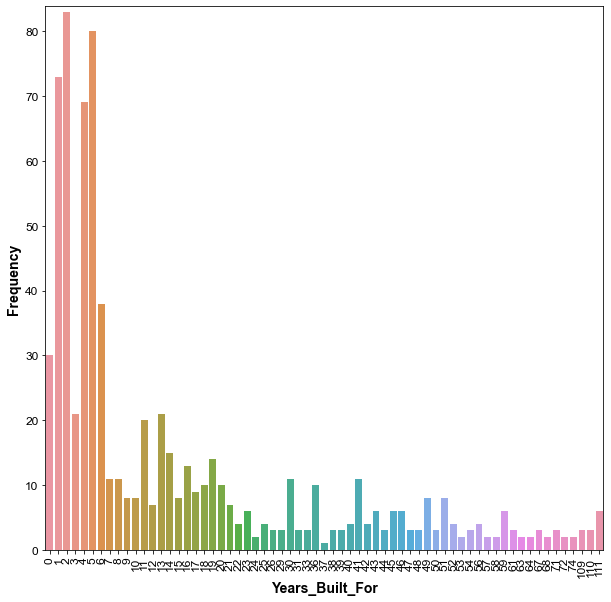

In [24]:
Display_Barplot(df['Years_Built_For'], 10, 10, 1, len(df['Years_Built_For']), 'Years_Built_For')

The age of the listing is missing in many entries and therefore, the plot omits the entries with years built for as -1. We can see that there are many new listings which can potentially be explained by the fact that there is a lot of construction and new buildings coming up in the city, especially in Downtown.

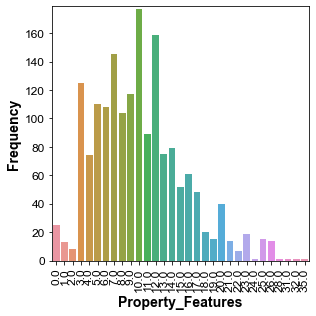

In [25]:
Display_Barplot(df['Property_features'], 4.5, 4.5, 0, 0, 'Property_Features')

A lot of property have decent property features and thus a lot of listings are in 4-15 range. As the property gets more exclusive and expensive, the frequency of such listing decreases. 

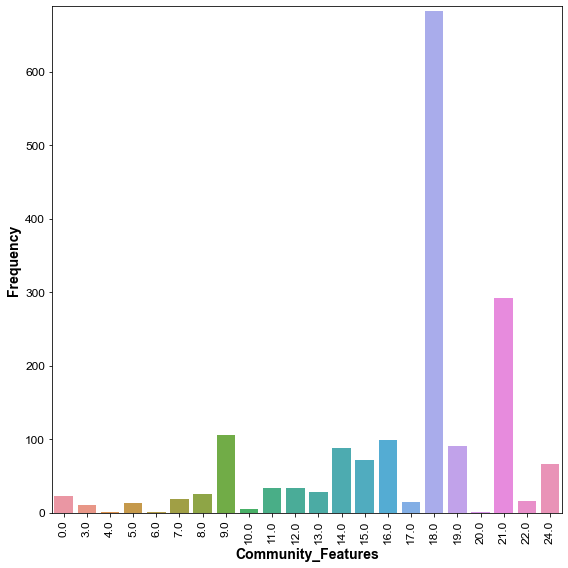

In [26]:
Display_Barplot(df['Community_features'], 8, 8, 0, 0, 'Community_Features')

The above plot shows that most of the listings have good score on community features. This shows that Calgary is a very liveable city, with good community oriented settings like footpath, bike paths, transit access, public library etc. throughout the city.

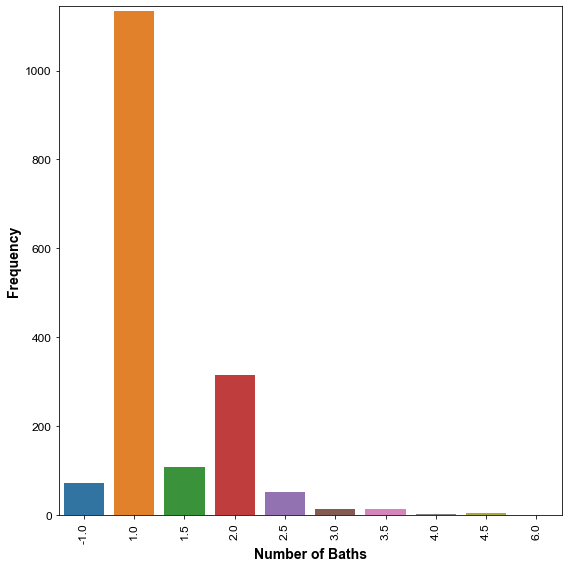

In [27]:
Display_Barplot(df['Baths'], 8, 8, 0, 0, 'Number of Baths')

Most of the listings have only one bathroom. and there are very few listings having >2 bathrooms which makes sense since a rental will have to be huge to require 2 bathrooms in the space.

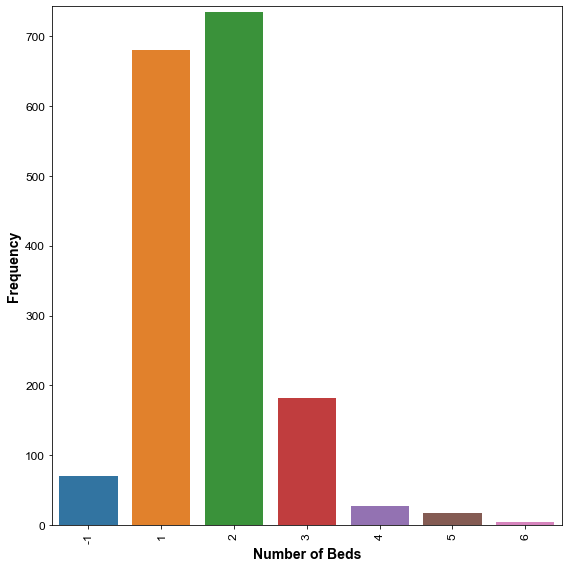

In [28]:
Display_Barplot(df['Beds'], 8, 8, 0, 0, 'Number of Beds')

Listings with one or two bedrooms are most common, showing that most listings are aimed at individuals or couples but not extended families.  

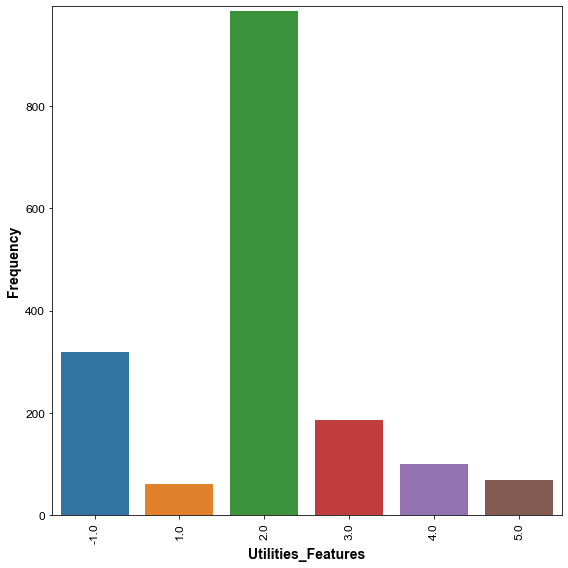

In [29]:
Display_Barplot(df['Utilities_info'], 8, 8, 0, 0, 'Utilities_Features')

Heat and Electricity are the most mentioned utilities in the listing and therefore the two utility features are most common.

In [30]:
df['Furnishing'].value_counts()

 0    1450
 1     198
-1      70
Name: Furnishing, dtype: int64

Omitting -1 (i.e. empty) listings for furnishing barplot.

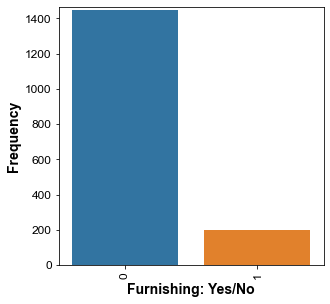

In [31]:
Display_Barplot(df['Furnishing'], 4.75, 4.75, 0, 2, 'Furnishing: Yes/No')

Majority of the listings are unfurnished.

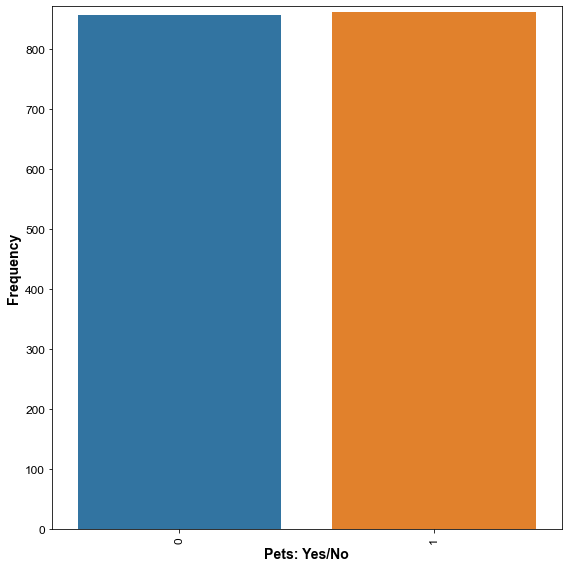

In [32]:
Display_Barplot(df['Pets'], 8, 8, 0, 0, 'Pets: Yes/No')

It can be inferred that Calgary is pet friendly city. As per the rental situation, almost half of all listings allow pets.

In [33]:
df['Smoking'].value_counts()

 0    1543
 1     163
-1      12
Name: Smoking, dtype: int64

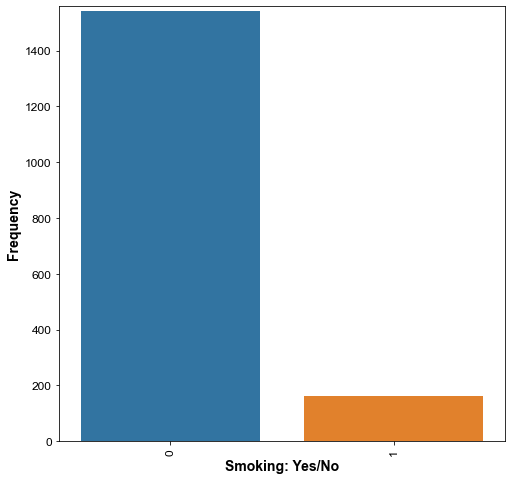

In [34]:
Display_Barplot(df['Smoking'], 8, 8, 0, 2, 'Smoking: Yes/No')

Smoking is not encouraged by the landlords and most of the listings mention their listing as smoking free.

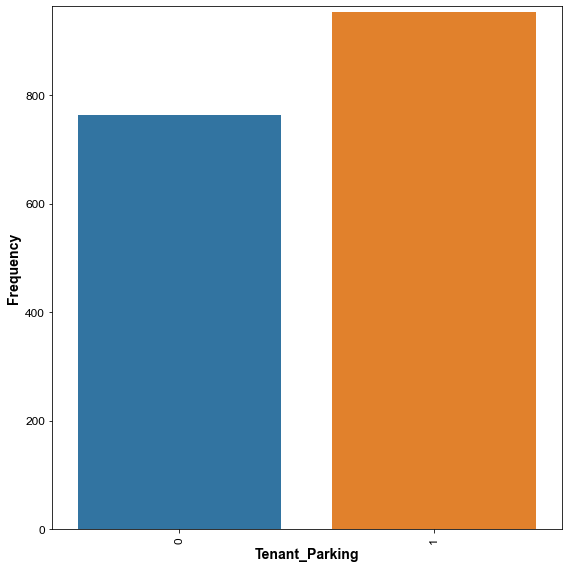

In [35]:
Display_Barplot(df['Tenant_Parking'], 8, 8, 0, 0, 'Tenant_Parking')

A majority of the listing have protected parking in Calgary. This makes sense as most of the listings are near downtown and they have parking arangements of some sort. It would not be feasible for so many people to park their cars on the street as that would choke the downtown roads due to lack of space.

## Continuous Variables (Histograms)


I define a *Display_Histogram* function which generates histograms for continuous (numerical) variables in a proper format. This function takes the desired size of output figure with *Size*. It also displays values only within specific ranges given by *Lower_Limit* and *Upper_Limit*. 

In [36]:
def Display_Histogram(DataFrame, Column, Size, Lower_Limit, Upper_Limit, Bins):
    
    font = {'fontname':'Arial'}
    plt.figure(figsize=(Size,Size), tight_layout=True)
    bins = Bins
    plt.xlim(Lower_Limit, Upper_Limit)
    plt.hist(DataFrame[Column], bins=bins, linewidth=2, range=(Lower_Limit, Upper_Limit))

    plt.xlabel(Column, fontsize = 14, fontweight = 'bold', **font)
    plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold', **font)
    plt.xticks(fontsize = 12, **font)
    plt.yticks(fontsize = 12, **font)
    
    return plt.show()

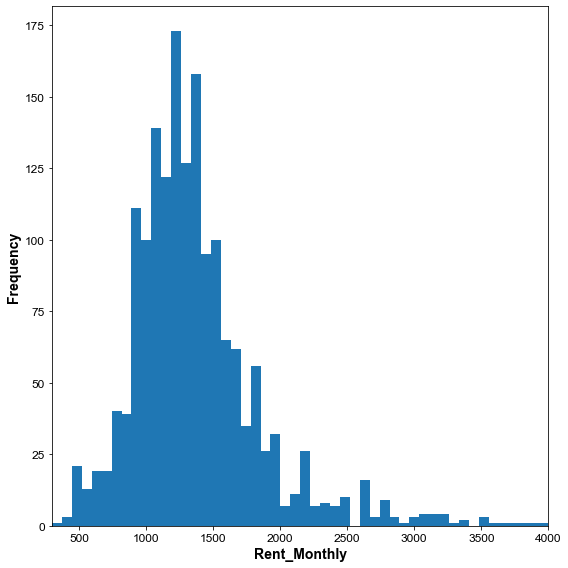

In [37]:
Display_Histogram(df, 'Rent_Monthly', 8, 300, 4000, 50)

Most of the listings have a monthly rent between ~750 and ~1750 dollars. The distribution is left skewed and the number of apartments with higher rent is very less.

In [38]:
df['Rent_Monthly'].describe()

count     1718.000000
mean      1407.528522
std        674.964694
min          0.000000
25%       1075.000000
50%       1295.000000
75%       1558.500000
max      12750.000000
Name: Rent_Monthly, dtype: float64

In [39]:
len(df.loc[df['Rent_Monthly'] > 4000]) 

19

In [40]:
len(df.loc[df['Rent_Monthly'] < 300]) 

8

There are only 27 listings that have rent greater than 4000 or less than 300. It makes sense to delete these entries from the analysis and model building as they are outliers and they can affect the overall accuracy of our model.

In [41]:
df.loc[df['Rent_Monthly'] > 4000]

,Neighbourhood,Pets,Smoking,Tenant_Parking,Building_features,Property_features,Community_features,Utilities_info,Listing_Type,Sq_Feet,Furnishing,Baths,Beds,Rent_Monthly,Landlord_On_Rentfaster_For,Years_Built_For,Fulldescription_len,Listings_Title_len
221,Hillhurst,1,0,1,0.0,25.0,18.0,-1.0,Townhouse,2800,1,3.5,3,5250,10,8,902,31
478,Downtown,1,0,1,5.0,12.0,18.0,4.0,Apartment,1225,0,2.0,3,4610,-1,-1,3857,27
615,Bridgeland,1,0,1,1.0,19.0,16.0,4.0,Townhouse,-1,1,3.0,3,4875,-1,2,679,45
633,Patterson Heights,0,0,1,0.0,21.0,11.0,5.0,Main,-1,1,3.0,4,5000,2,-1,694,74
652,Downtown,1,0,1,9.0,21.0,18.0,5.0,Apartment,1225,-1,2.0,3,4610,-1,1,3146,77
653,Downtown,1,0,1,9.0,21.0,18.0,5.0,Apartment,1425,-1,2.0,3,5270,-1,1,3146,77
730,Hamptons,0,0,1,0.0,28.0,10.0,-1.0,House,4530,0,4.5,5,6300,-1,14,2494,80
768,Currie Barracks,1,0,1,0.0,35.0,11.0,-1.0,House,5500,1,6.0,6,12750,-1,-1,1730,44
908,Eau Claire,1,0,1,12.0,31.0,18.0,2.0,Condo,-1,1,2.0,2,5200,12,10,3904,63
1006,Edgemont,0,0,1,0.0,23.0,18.0,-1.0,House,-1,1,3.5,3,4250,5,-1,186,57


In [42]:
df.loc[df['Rent_Monthly'] < 300]

,Neighbourhood,Pets,Smoking,Tenant_Parking,Building_features,Property_features,Community_features,Utilities_info,Listing_Type,Sq_Feet,Furnishing,Baths,Beds,Rent_Monthly,Landlord_On_Rentfaster_For,Years_Built_For,Fulldescription_len,Listings_Title_len
87,South Calgary,1,0,0,0.0,5.0,21.0,2.0,Apartment,-1,0,-1.0,-1,0,-1,-1,2655,16
389,Mission,1,0,0,0.0,6.0,18.0,2.0,Apartment,-1,0,-1.0,-1,0,-1,-1,2893,12
549,Downtown,0,-1,0,0.0,0.0,0.0,-1.0,Parking,-1,-1,-1.0,-1,110,7,-1,213,56
1026,Forest Lawn,0,-1,0,0.0,0.0,0.0,-1.0,Storage,-1,-1,-1.0,-1,175,14,-1,93,34
1212,Mount Pleasant,0,-1,0,0.0,0.0,0.0,-1.0,Storage,-1,-1,-1.0,-1,190,3,-1,379,77
1266,Banff Trail,0,-1,0,0.0,0.0,0.0,3.0,Storage,-1,-1,-1.0,-1,150,13,-1,176,73
1314,Sunnyside,0,0,0,0.0,8.0,21.0,2.0,Parking,-1,0,-1.0,-1,75,-1,-1,472,37
1357,Beltline,0,-1,0,0.0,0.0,0.0,-1.0,Office,-1,-1,-1.0,-1,50,-1,-1,333,70


We can see that most of the expensive listings are big rentals like a whole house or townhouse and most of the extremely cheap listings are storage and other type of listings that we are not interested in.

In [43]:
df['Sq_Feet'].describe()

count    1.718000e+03
mean     6.972819e+03
std      2.622846e+05
min     -1.000000e+00
25%     -1.000000e+00
50%      6.700000e+02
75%      9.130000e+02
max      1.087199e+07
Name: Sq_Feet, dtype: float64

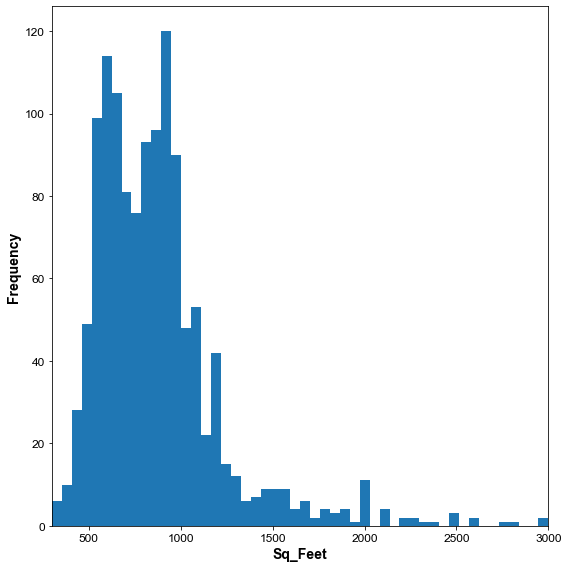

In [44]:
Display_Histogram(df, 'Sq_Feet', 8, 300, 3000, 50)

Most of the listing have a sq. feet area between ~500 and ~1250 sq. feet. The distribution is left-skewed and there are very few listings >1500 sq. feet.

In [45]:
len(df.loc[df['Sq_Feet'] > 3000]) 

5

In [46]:
df.loc[df['Sq_Feet'] > 3000]

,Neighbourhood,Pets,Smoking,Tenant_Parking,Building_features,Property_features,Community_features,Utilities_info,Listing_Type,Sq_Feet,Furnishing,Baths,Beds,Rent_Monthly,Landlord_On_Rentfaster_For,Years_Built_For,Fulldescription_len,Listings_Title_len
424,Millrise,0,0,1,0.0,14.0,15.0,-1.0,House,10871994,0,1.5,4,1500,3,-1,880,76
730,Hamptons,0,0,1,0.0,28.0,10.0,-1.0,House,4530,0,4.5,5,6300,-1,14,2494,80
768,Currie Barracks,1,0,1,0.0,35.0,11.0,-1.0,House,5500,1,6.0,6,12750,-1,-1,1730,44
1091,Edgemont,1,1,1,0.0,26.0,18.0,5.0,House,5000,1,3.5,6,6000,10,-1,2727,80
1306,Springbank,1,0,1,0.0,13.0,20.0,-1.0,Acreage,3200,0,4.0,5,6000,-1,23,1770,47


Again like monthly rent, I removed the outlier values for sq. feet (below 300 and above 3000) as they would skew the analysis.

In [47]:
len(df.loc[df['Sq_Feet'] < 300])

460

In [48]:
len(df.loc[df['Sq_Feet'] < 0])

456

There are 4 values between 0 and 300 and they are outlier and will be removed. The 456 other values less than 0 are -1, basically empty entries that will be imputed later.

In [49]:
df['Fulldescription_len'].describe()

count    1718.000000
mean     1468.511641
std       973.594315
min         3.000000
25%       682.750000
50%      1246.500000
75%      2012.000000
max      5867.000000
Name: Fulldescription_len, dtype: float64

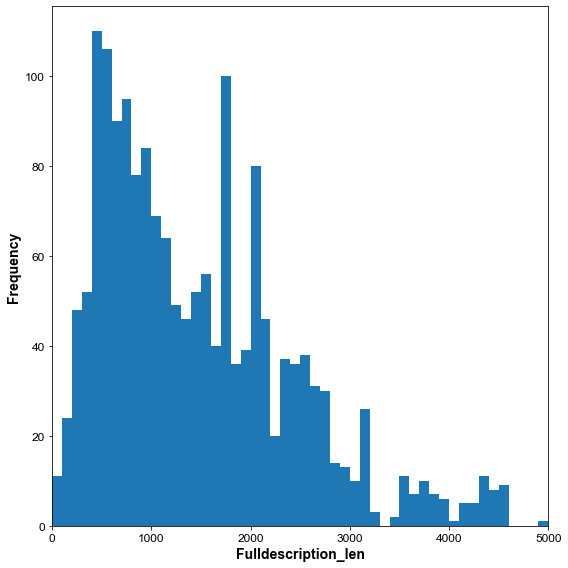

In [50]:
Display_Histogram(df, 'Fulldescription_len', 8, 0, 5000, 50)

Most of the listing have full description that is less than 3000 words and overall the distribution is left skewed.

In [51]:
df['Listings_Title_len'].describe()

count    1718.000000
mean       43.229336
std        21.136956
min         4.000000
25%        25.000000
50%        44.000000
75%        60.000000
max        80.000000
Name: Listings_Title_len, dtype: float64

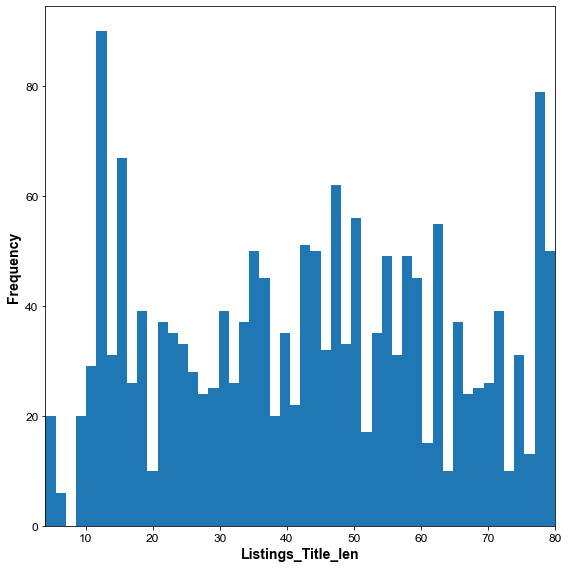

In [52]:
Display_Histogram(df, 'Listings_Title_len', 8, 4, 80, 50)

The length of the listing title is unifromly spread between 0-80 words.

## Dataset Cleaning after Drawing Inferences 

Taking lead from the insights gained in the univariate analysis, I cleaned up the dataset further to make it more suited for model building.

### Numerical Variables

First I took care of the numerical variables.

In [53]:
df.drop(df.loc[df['Rent_Monthly'] > 4000].index, inplace=True)
df.drop(df.loc[df['Rent_Monthly'] < 300].index, inplace=True)
df = df.reset_index(drop=True)

I removed entries with monthly rent gretaer than 4000 or less than 300 (27 entries in total) since they are outliers.

In [54]:
df['Rent_Monthly'].describe()

count    1691.000000
mean     1369.024246
std       486.806997
min       340.000000
25%      1075.000000
50%      1295.000000
75%      1550.000000
max      4000.000000
Name: Rent_Monthly, dtype: float64

27 rows dropped in the dataframe.

Next I modify the values in sq. feet column.

In [55]:
df['Sq_Feet'].describe()

count    1.691000e+03
mean     7.065038e+03
std      2.643703e+05
min     -1.000000e+00
25%     -1.000000e+00
50%      6.700000e+02
75%      9.100000e+02
max      1.087199e+07
Name: Sq_Feet, dtype: float64

In [56]:
len(df.loc[df['Sq_Feet'] > 3000])

1

In [57]:
df.drop(df.loc[df['Sq_Feet'] > 3000].index, inplace=True)
df = df.reset_index(drop=True)

I drop entries for which the overall area is greater than 3000 sq. feet as they are outliers.

There are many empty entries (with values -1) and I impute the average value of sq. feet (at the remaining places) in those empty entries.

In [58]:
df['Sq_Feet'].iloc[df[df['Sq_Feet'] < 0].index] = int(df[df['Sq_Feet'] > 300].Sq_Feet.mean())

In [59]:
len(df.loc[df['Sq_Feet'] < 300])

4

In [60]:
df.drop(df.loc[df['Sq_Feet'] < 300].index, inplace=True)
df = df.reset_index(drop=True)

There are 4 entries for which the sq. feet is between 0-300. I drop these entries as they are outliers and I am not interested in listings for which sq. feet area is less than 300.

In [61]:
df['Sq_Feet'].describe()

count    1686.000000
mean      863.870700
std       297.044182
min       300.000000
25%       685.000000
50%       864.000000
75%       910.000000
max      3000.000000
Name: Sq_Feet, dtype: float64

The numerical variables look clean now.

### Categorical Variables

After numerical variables, I cleaned up the categorical variables.

In [62]:
df.describe()

,Pets,Smoking,Tenant_Parking,Building_features,Property_features,Community_features,Utilities_info,Sq_Feet,Furnishing,Baths,Beds,Rent_Monthly,Landlord_On_Rentfaster_For,Years_Built_For,Fulldescription_len,Listings_Title_len
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.501779,0.091934,0.554567,3.466785,10.008304,16.801898,1.755042,863.870700,0.074733,1.222716,1.654804,1369.851720,3.013049,6.568209,1461.707592,43.094899
std,0.500145,0.303051,0.497161,4.565100,5.178584,4.421544,1.513506,297.044182,0.379429,0.674293,0.933102,487.037036,5.218303,16.512160,964.050562,21.063938
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,300.000000,-1.000000,-1.000000,-1.000000,340.000000,-1.000000,-1.000000,3.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,15.000000,2.000000,685.000000,0.000000,1.000000,1.000000,1075.000000,-1.000000,-1.000000,685.500000,24.000000
50%,1.000000,0.000000,1.000000,2.000000,10.000000,18.000000,2.000000,864.000000,0.000000,1.000000,2.000000,1295.000000,1.000000,-1.000000,1238.000000,44.000000
75%,1.000000,0.000000,1.000000,5.000000,13.000000,19.000000,2.000000,910.000000,0.000000,1.500000,2.000000,1550.000000,6.000000,5.000000,2006.000000,60.000000
max,1.000000,1.000000,1.000000,28.000000,26.000000,24.000000,5.000000,3000.000000,1.000000,4.500000,6.000000,4000.000000,16.000000,111.000000,5867.000000,80.000000


In [63]:
df['Smoking'].value_counts()

 0    1517
 1     162
-1       7
Name: Smoking, dtype: int64

In [64]:
df['Smoking'].iloc[df.loc[df['Smoking'] == -1].index] = 0

I replace 7 entries that were empty with 0 (meaning smoking not allowed) as majority of the listings do not allow smoking. 

In [65]:
df['Smoking'].value_counts()

0    1524
1     162
Name: Smoking, dtype: int64

In [66]:
df['Utilities_info'].value_counts()

 2.0    976
-1.0    307
 3.0    184
 4.0     97
 5.0     63
 1.0     59
Name: Utilities_info, dtype: int64

I replace the  utilitiy features score with the median value. This makes sense since most of the entries have a utility score of 2.

In [67]:
df['Utilities_info'].iloc[df.loc[df['Utilities_info'] == -1].index] = df.Utilities_info[df['Utilities_info'] > 0].median()

In [68]:
df['Utilities_info'].value_counts()

2.0    1283
3.0     184
4.0      97
5.0      63
1.0      59
Name: Utilities_info, dtype: int64

In [69]:
df['Furnishing'].value_counts()

 0    1434
 1     189
-1      63
Name: Furnishing, dtype: int64

In [70]:
df['Furnishing'].iloc[df.loc[df['Furnishing'] == -1].index] = df.Furnishing[df['Furnishing'] > -1].median()

I replace empty values of furnishing with 0 as most of the listings are not furnished.

In [71]:
df['Furnishing'].value_counts()

0.0    1497
1.0     189
Name: Furnishing, dtype: int64

In [72]:
df['Beds'].value_counts()

 2    730
 1    680
 3    174
-1     60
 4     25
 5     14
 6      3
Name: Beds, dtype: int64

In [73]:
df['Beds'].iloc[df.loc[df['Beds'] == -1].index] = df.Beds[df['Beds'] > -1].median()

For the empty values in Beds column, I replaced it with the median value of number of beds (i.e. 2).

In [74]:
df['Beds'].value_counts()

2.0    790
1.0    680
3.0    174
4.0     25
5.0     14
6.0      3
Name: Beds, dtype: int64

In [75]:
df['Baths'].value_counts()

 1.0    1132
 2.0     309
 1.5     107
-1.0      62
 2.5      50
 3.0      12
 3.5      11
 4.5       3
Name: Baths, dtype: int64

In [76]:
df['Baths'].iloc[df.loc[df['Baths'] == -1].index] = df.Baths[df['Baths'] > -1].median()

For the empty values in Baths column, I replaced it with the median value of number of Baths. This makes sense over imputing mean values as mean will be fractional number and it doesn't make sense to have a fractional number of Baths (like 1.31).

In [77]:
df['Baths'].value_counts()

1.0    1194
2.0     309
1.5     107
2.5      50
3.0      12
3.5      11
4.5       3
Name: Baths, dtype: int64

Then I convert data types of the columns from float to integer.

In [78]:
df['Building_features'] = df['Building_features'].astype(int)
df['Community_features'] = df['Community_features'].astype(int)
df['Property_features'] = df['Property_features'].astype(int)
df['Furnishing'] = df['Furnishing'].astype(int)
df['Beds'] = df['Beds'].astype(int)
df['Utilities_info'] = df['Utilities_info'].astype(int)

### High Proportion of Values Missing

The below two columns have missing entries for ~50% of the data. Since there are so many missing entries, it makes sense to drop these variable when selecting variables to build the predictive machine learning model.

In [79]:
df['Landlord_On_Rentfaster_For'].value_counts()

-1     831
 1     121
 4     102
 2      76
 12     76
 6      64
 3      58
 7      57
 5      51
 16     42
 15     34
 13     34
 14     32
 11     31
 10     28
 8      28
 9      21
Name: Landlord_On_Rentfaster_For, dtype: int64

In [80]:
df['Years_Built_For'].value_counts()

-1      955
 2       82
 5       79
 1       71
 4       68
 6       38
 0       30
 3       21
 13      21
 11      20
 14      14
 19      14
 16      13
 41      11
 30      11
 7       11
 36      10
 8       10
 20      10
 18      10
 17       9
 51       8
 49       8
 9        8
 15       8
 21       7
 10       7
 111      6
 59       6
 12       6
 45       6
 43       6
 46       6
 23       5
 25       4
 56       4
 40       4
 22       4
 42       4
 52       4
 61       3
 71       3
 54       3
 110      3
 109      3
 26       3
 29       3
 31       3
 33       3
 38       3
 39       3
 44       3
 47       3
 48       3
 50       3
 67       3
 74       2
 68       2
 72       2
 24       2
 64       2
 63       2
 58       2
 53       2
 57       2
 37       1
Name: Years_Built_For, dtype: int64

In [81]:
df.describe()

,Pets,Smoking,Tenant_Parking,Building_features,Property_features,Community_features,Utilities_info,Sq_Feet,Furnishing,Baths,Beds,Rent_Monthly,Landlord_On_Rentfaster_For,Years_Built_For,Fulldescription_len,Listings_Title_len
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.501779,0.096085,0.554567,3.466785,10.008304,16.801898,2.301305,863.870700,0.112100,1.296263,1.761566,1369.851720,3.013049,6.568209,1461.707592,43.094899
std,0.500145,0.294796,0.497161,4.565100,5.178584,4.421544,0.787490,297.044182,0.315583,0.518939,0.782657,487.037036,5.218303,16.512160,964.050562,21.063938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000,1.000000,1.000000,340.000000,-1.000000,-1.000000,3.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,15.000000,2.000000,685.000000,0.000000,1.000000,1.000000,1075.000000,-1.000000,-1.000000,685.500000,24.000000
50%,1.000000,0.000000,1.000000,2.000000,10.000000,18.000000,2.000000,864.000000,0.000000,1.000000,2.000000,1295.000000,1.000000,-1.000000,1238.000000,44.000000
75%,1.000000,0.000000,1.000000,5.000000,13.000000,19.000000,2.000000,910.000000,0.000000,1.500000,2.000000,1550.000000,6.000000,5.000000,2006.000000,60.000000
max,1.000000,1.000000,1.000000,28.000000,26.000000,24.000000,5.000000,3000.000000,1.000000,4.500000,6.000000,4000.000000,16.000000,111.000000,5867.000000,80.000000


# Bivariate Analysis

I performed bivariate analysis after observing the individual distribution of variables under univariate analysis. I was interested in observing how the monthly rent of a listing depended on different variables and therefore, bivariate analysis made sense. First, I plotted Scatterplots and Correlation Matrix to observe the dependance of of monthly rent on numerical (continuous) variables. Next, I observed the variation in monthly rent with respect to categorical variables with the help of Swarmplots. Finally, I built some pivot tables to get a better understanding of the underlying factors determining monthly rental prices in Calgary.    

##  Numerical-Numerical Relationship


I define a *Display_Scatterplot* function which generates Scatterplots in a proper format. This function takes the desired size of output figure with *Size*. 

In [82]:
def Display_Scatterplot(DataFrame, X_Label, Y_Label, Size):
    font = {'fontname':'Arial'}
    plt.figure(figsize=(Size, Size))
    plt.xlabel(X_Label, fontsize=14, **font, fontweight='bold')
    plt.ylabel(Y_Label, fontsize=14, **font, fontweight='bold')
    plt.xticks(fontsize = 12, **font)
    plt.yticks(fontsize = 12, **font)
    plt.xlim(min(DataFrame[X_Label])/(10/9), 1.02*max(DataFrame[X_Label]))
    plt.ylim(min(DataFrame[Y_Label])/(10/9), 1.02*max(DataFrame[Y_Label]))
    
    return sns.scatterplot(x=DataFrame[X_Label], y=DataFrame[Y_Label])

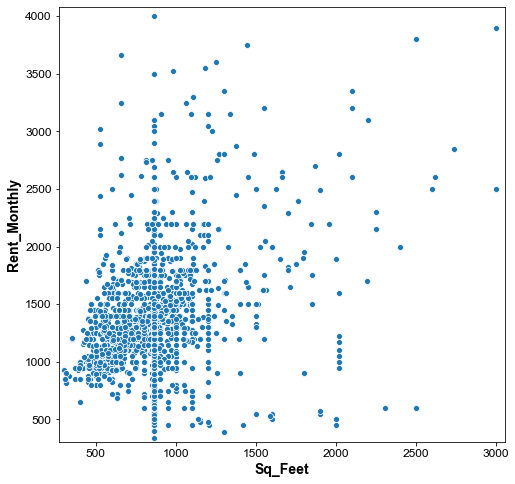

In [83]:
Display_Scatterplot(df, 'Sq_Feet', 'Rent_Monthly', 8) ;

From the Scatterplot we can observe that the monthly rent has a postive correlation with respect to sq feet of the listing space. This makes sense since a bigger listing should have more monthly rent.

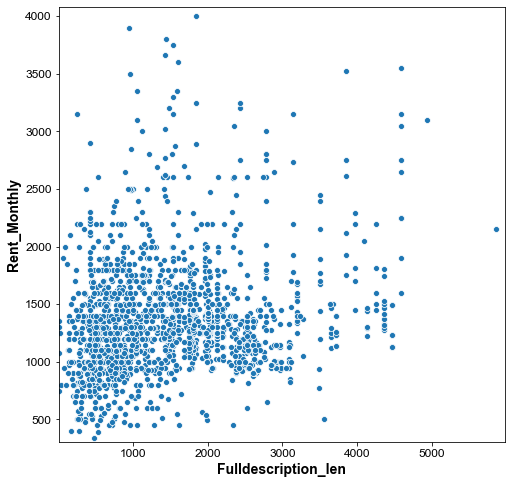

In [84]:
Display_Scatterplot(df, 'Fulldescription_len', 'Rent_Monthly', 8) ;

There is weak correlation between monthly rent and length of ad/description for the listing. Landlord for a more lavish and luxurious listing will tend to write more and more about the features and try to rent the place at higher rates. 

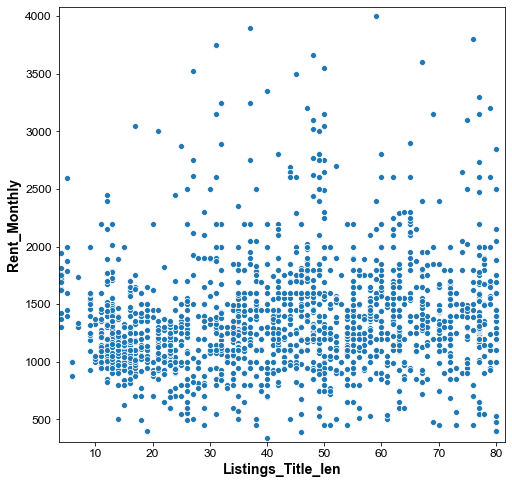

In [85]:
Display_Scatterplot(df, 'Listings_Title_len', 'Rent_Monthly', 8) ;

There is no apparent correlation between listing title length and its monthly rent. Thus, this variable can be dropped before building machine learning model on it.

In [86]:
df[['Rent_Monthly', 'Listings_Title_len', 'Fulldescription_len', 'Sq_Feet']].corr()

,Rent_Monthly,Listings_Title_len,Fulldescription_len,Sq_Feet
Rent_Monthly,1.000000,0.154465,0.186839,0.318102
Listings_Title_len,0.154465,1.000000,-0.105262,0.118848
Fulldescription_len,0.186839,-0.105262,1.000000,-0.185413
Sq_Feet,0.318102,0.118848,-0.185413,1.000000


I computed the correlation matrix using .corr. The values follow the pattern apparent from scatterplots; sq. feet of the listing has the strongest correlation to monthly rent and title length has the weakest correlation. 

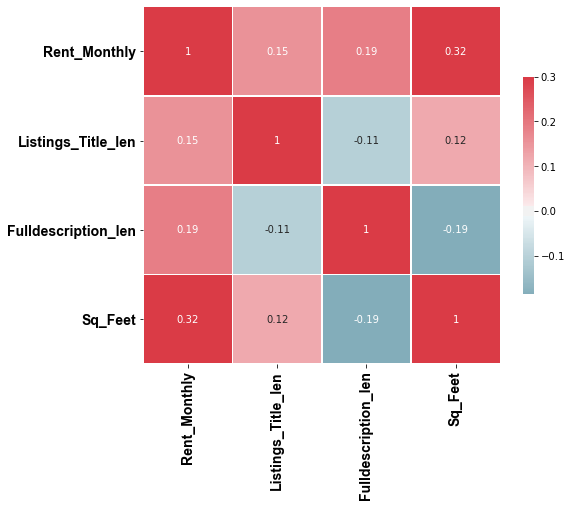

In [87]:
#ref: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/data_eda.ipynb
plt.figure(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
font = {'fontname':'Arial'}
plt.xticks(fontsize = 14, **font, fontweight='bold')
plt.yticks(fontsize = 14, **font, fontweight='bold')

sns.heatmap(df[['Rent_Monthly', 'Listings_Title_len', 'Fulldescription_len', 'Sq_Feet']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True) ;

I plotted the  correlation matrix in heatmap format for better visualisation. Here, darker the colour of the box, higher is the correlation between the two corresponding variables (see sq. feet and monthly rent).

## Categorical-Numerical Relationship

I define a *Display_Swarmplot* function which generates Swarmplot in a proper format. This function takes the desired size of output figure with *Size*. It can also display the most common variable types only by taking inputs with *(Start, End)*. For example for neighbourhood variable below, I plot between the most common and 24th most common type since *(Start, End)* is (0,25).

In [88]:
def Display_Swarmplot(DataFrame, X_Label, Y_Label, Size, Font, Rotation, Start, End):
    font = {'fontname':Font}
    plt.figure(figsize=(Size, Size))
    plt.xlabel(X_Label, fontsize=14, **font, fontweight='bold')
    plt.ylabel(Y_Label, fontsize=14, **font, fontweight='bold')
    plt.xticks(fontsize = 12, **font, rotation= Rotation)
    plt.yticks(fontsize = 12, **font)

    if((Start+End)!=0):
        
        List = list(np.array(df[X_Label].value_counts().index)[Start :End])
        df_temp_main = pd.DataFrame()
        for item in List:
            df_temp = df[df[X_Label] == item]
            df_temp_main = pd.concat([df_temp_main, df_temp], ignore_index=True)
            X_short = df_temp_main[X_Label]
            Y_short = df_temp_main[Y_Label]
            
        return sns.swarmplot(x=X_short, y=Y_short)
    
    return sns.swarmplot(x=df[X_Label], y=df[Y_Label])

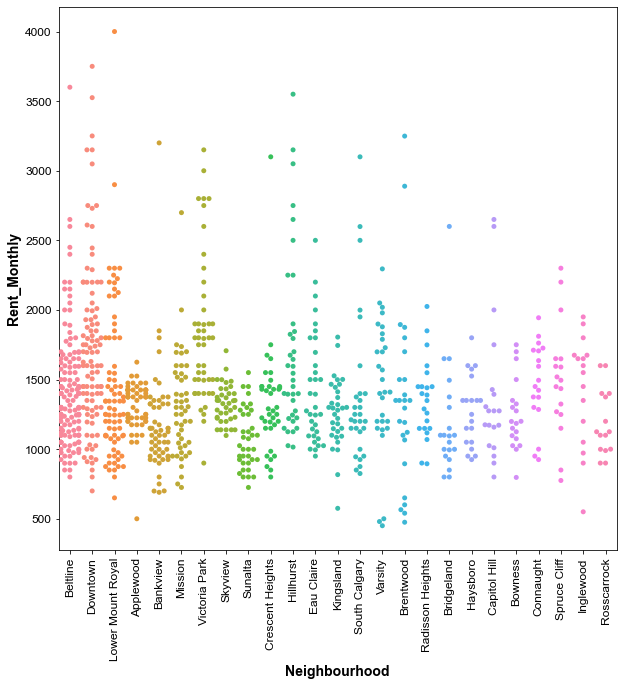

In [89]:
Display_Swarmplot(df, 'Neighbourhood', 'Rent_Monthly', 10, 'Arial', 90, 0, 25) ;

We can observe two things in the swarmplot above. First, many of the expensive listings are in Downtown, Beltline and Lower Mount Royal. Second, Brentwood and Varsity have clusters of cheap rentals (usually basement and shared) which are meant for students as these neighbourhoods are adjacent to University of Calgary. 

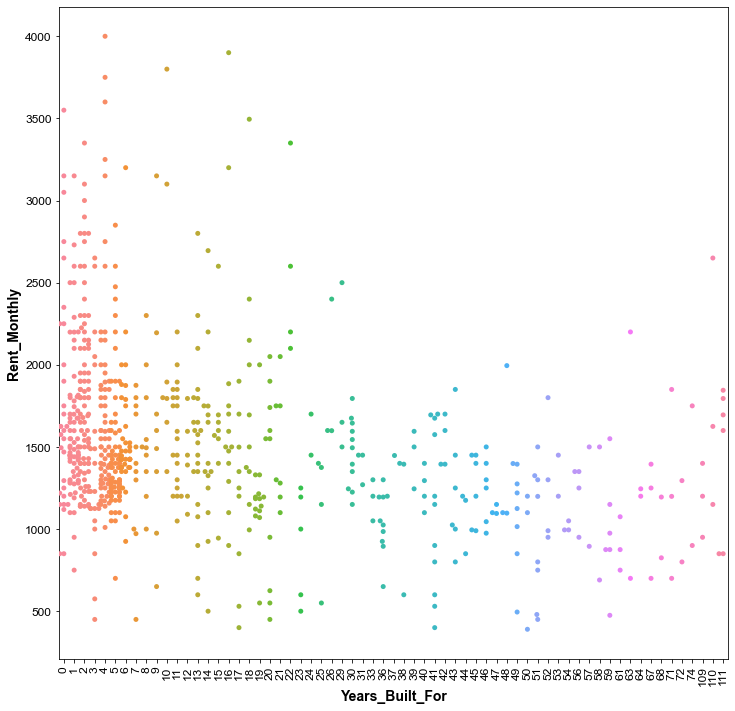

In [90]:
Display_Swarmplot(df, 'Years_Built_For', 'Rent_Monthly', 12,
                  'Arial', 90, 1, len(df['Years_Built_For'].value_counts())) ;

I have not displayed entries with values not given (i.e. -1). Overall, it looks like a listing has to be new for it to be expensive. However, I will drop this variable during machine learning model building since this column has ~50% values missing (i.e. -1).

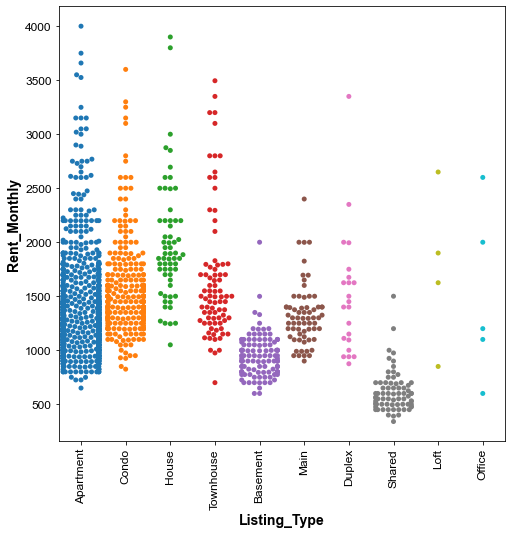

In [91]:
Display_Swarmplot(df, 'Listing_Type', 'Rent_Monthly', 8, 'Arial', 90, 0, 0) ;

Listing type affects its monthly rent, shared and basement type of listings have lower monthly rent and house and townhouse have higher rents. Also, I noticed that there are some listing of office type which are not of my interest and therefore they will be dropped before model building.

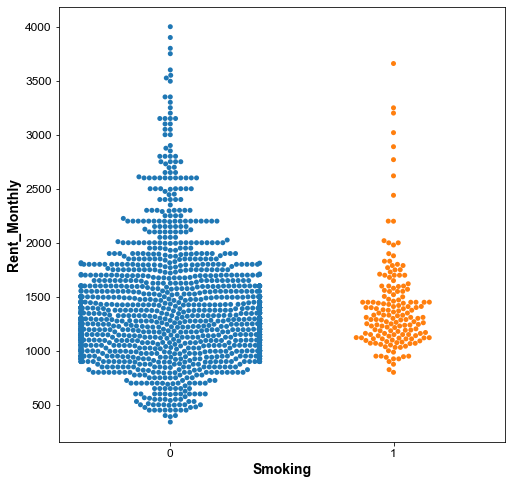

In [92]:
Display_Swarmplot(df, 'Smoking', 'Rent_Monthly', 8, 'Arial', 0, 0, 0) ;

Most of the listings do not allow smoking and those that do, they do not seem to be having higher/lower rents on average. Therefore this feature can be dropped before model building.

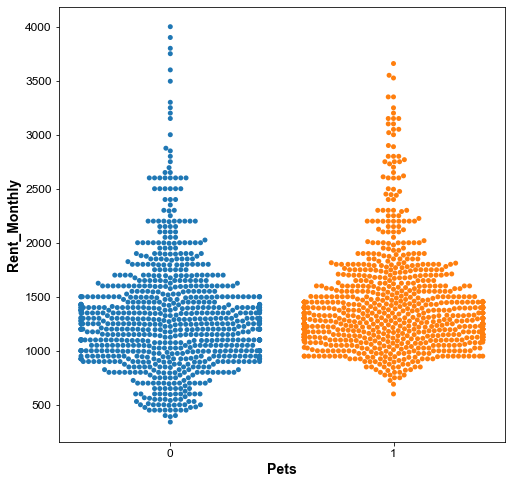

In [93]:
Display_Swarmplot(df, 'Pets', 'Rent_Monthly', 8, 'Arial', 0, 0, 0) ;

We can clearly see in the plot above that those listing making accomodations for pets and allowing them have higher monthly rents on average.

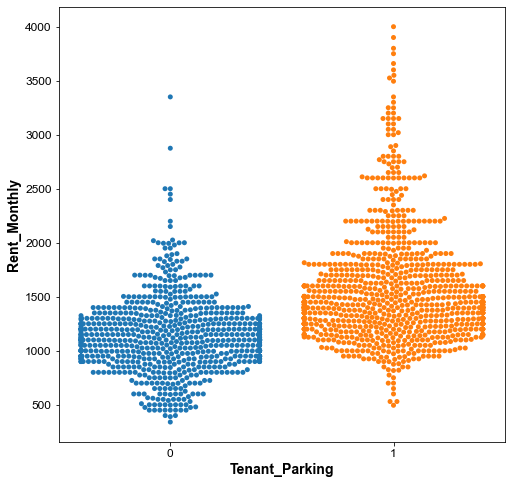

In [94]:
Display_Swarmplot(df, 'Tenant_Parking', 'Rent_Monthly', 8, 'Arial', 0, 0, 0) ;

Again, listings having protected parking in form of underground/covered etc. have higher monthly rent.

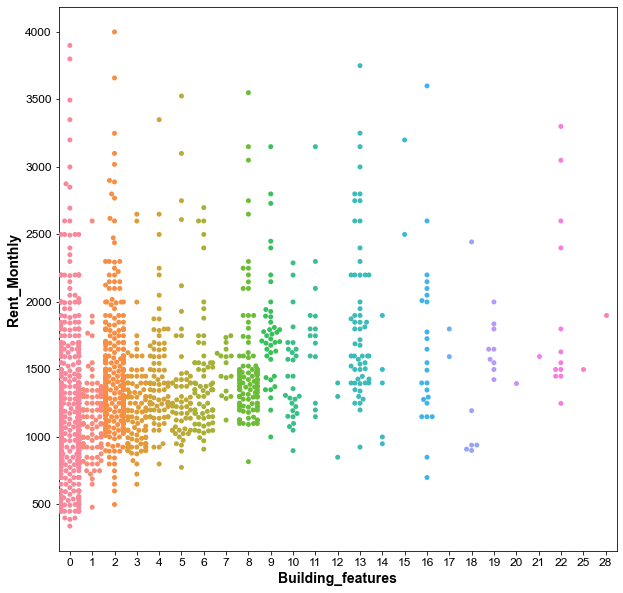

In [95]:
Display_Swarmplot(df, 'Building_features', 'Rent_Monthly', 10, 'Arial', 0, 0, 0) ;

Many of the listings are not in a building setting and thus they do not have a building feature score. Therefore, there are many with 0 score. For those that have a building feature score, it can be observed that a more luxurious building with higher building feature score has higher monthly rent.

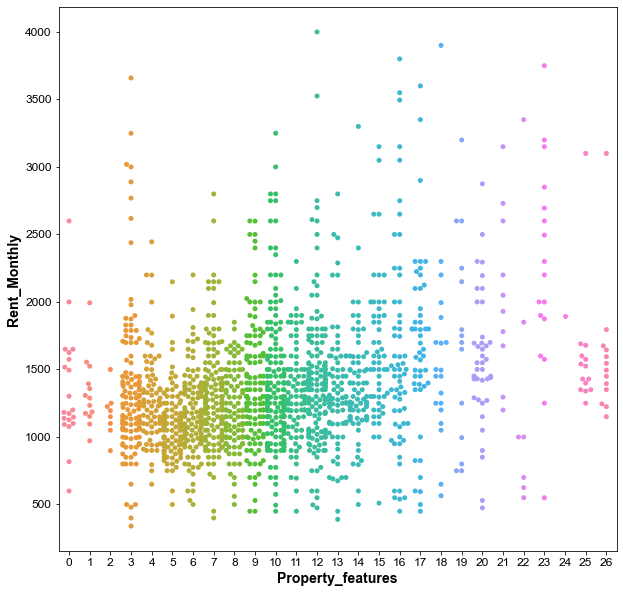

In [96]:
Display_Swarmplot(df, 'Property_features', 'Rent_Monthly', 10, 'Arial', 0, 0, 0) ;

A weak correlation can be seen between a higher property feature score and increasing monthly rent.

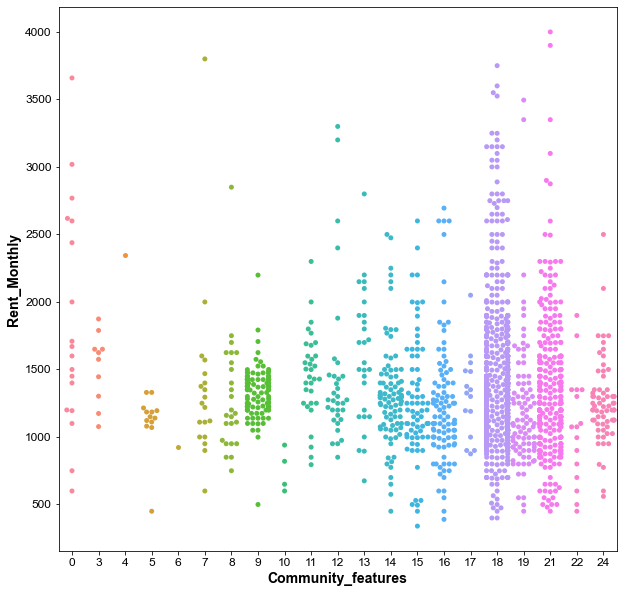

In [97]:
Display_Swarmplot(df, 'Community_features', 'Rent_Monthly', 10, 'Arial', 0, 0, 0) ;

As mentioned during the univariate analysis, most of the listing in Calgary have a good community feature score due to various features in the city such as bike paths, public libraries, transit access etc. and thus, this shows that Calgary is a good city to live in as a whole. But higher community score doesn't imply a higher rent, since the whole city has a higher score in general.

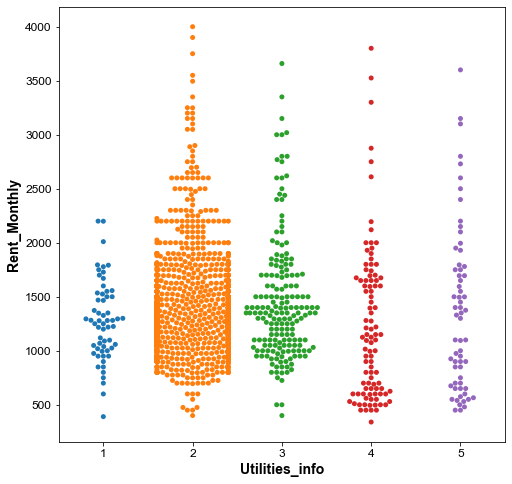

In [98]:
Display_Swarmplot(df, 'Utilities_info', 'Rent_Monthly', 8, 'Arial', 0, 0, 0) ;

Most of the modern living spaces have features such as water, heat, electricity, cable and internet and thus this is not a factor determining monthly rent. This variable will be dropped before model building.

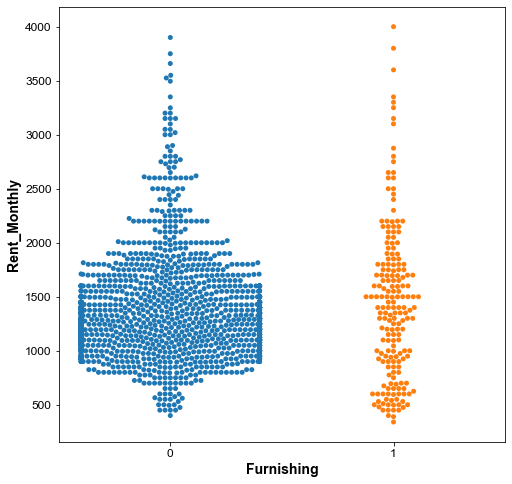

In [99]:
Display_Swarmplot(df, 'Furnishing', 'Rent_Monthly', 8, 'Arial', 0, 0, 0) ;

Very few listings are furnished and this is not a determining factor for monthly rent. This will also be dropped before building a machine learning model.

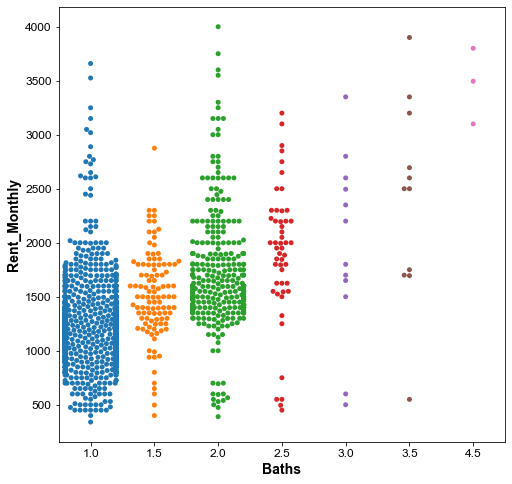

In [100]:
Display_Swarmplot(df, 'Baths', 'Rent_Monthly', 8, 'Arial', 0, 0, 0) ;

Number of baths in a listing has a clear positive correlation with the monthly rent.

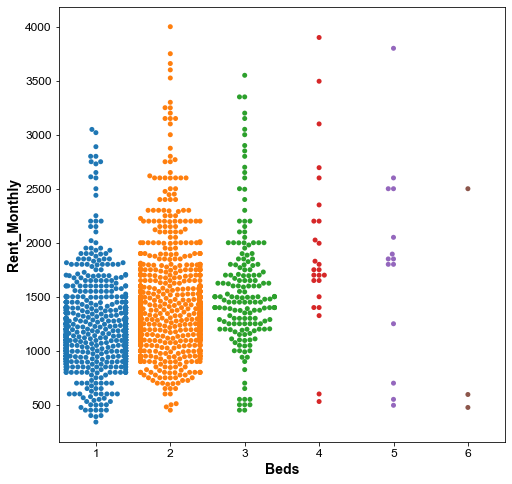

In [101]:
Display_Swarmplot(df, 'Beds', 'Rent_Monthly', 8, 'Arial', 0, 0, 0) ;

Similarily, number of beds in a listing also has a clear positive correlation with the monthly rent.

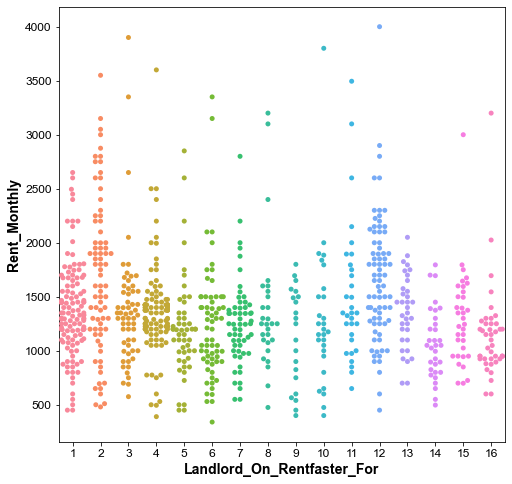

In [102]:
Display_Swarmplot(df, 'Landlord_On_Rentfaster_For', 'Rent_Monthly', 8,
                  'Arial', 0, 1, len(df['Landlord_On_Rentfaster_For'].value_counts())) ;

The years since when the landlord is using rentfaster does not affect the price of listing. Moreover, Many of the listings (~50%) do not have value for this variable and thus this column will be dropped before model building.

## Pivot Tables

Taking a quick look at all the columns.

In [103]:
df.columns


Index(['Neighbourhood', 'Pets', 'Smoking', 'Tenant_Parking',
       'Building_features', 'Property_features', 'Community_features',
       'Utilities_info', 'Listing_Type', 'Sq_Feet', 'Furnishing', 'Baths',
       'Beds', 'Rent_Monthly', 'Landlord_On_Rentfaster_For', 'Years_Built_For',
       'Fulldescription_len', 'Listings_Title_len'],
      dtype='object')

As discussed before, most of the listings are in downtown.

In [104]:
df['Neighbourhood'].value_counts()[:25]

Beltline             145
Downtown              99
Lower Mount Royal     77
Applewood             56
Bankview              55
Mission               48
Victoria Park         46
Skyview               38
Sunalta               37
Crescent Heights      37
Hillhurst             36
Eau Claire            34
Kingsland             32
South Calgary         29
Varsity               29
Brentwood             25
Radisson Heights      22
Bridgeland            20
Haysboro              20
Capitol Hill          19
Bowness               19
Connaught             18
Spruce Cliff          17
Inglewood             16
Rosscarrock           15
Name: Neighbourhood, dtype: int64

I define a function to display pivot table as per a key. The pivot table is then displayed in a format where the elements are sorted as per their frequency. For example, Beltline is the neighbourhood with most listings and thus it is first in order in the pivot table below.

In [105]:
def Display_PivotTable_Key(Dataframe, Index_List, Target_Variable, Key):
    
    temp = Dataframe.pivot_table(index=Index_List, values = Target_Variable)
    i = temp.index.get_level_values(0)
    
    return temp.iloc[i.reindex(Dataframe[Key].value_counts().index)[1]][:25]

In [106]:
Display_PivotTable_Key(df, ['Neighbourhood', 'Beds'], 'Rent_Monthly', 'Neighbourhood')

Rent_Monthly
Neighbourhood     Beds              
Beltline          1      1290.405797
                  2      1473.422535
                  3      1852.600000
Downtown          1      1549.980769
                  2      1938.553191
Lower Mount Royal 1      1137.187500
                  2      1633.272727
                  3      2900.000000
Applewood         1      1209.166667
                  2      1429.000000
                  3      1625.000000
Bankview          1      1044.375000
                  2      1155.185185
                  3      2018.750000
Mission           1      1209.640000
                  2      1351.545455
                  3      2699.000000
Victoria Park     1      1648.888889
                  2      2115.526316
Skyview           1      1185.375000
                  2      1338.960000
                  3      1471.400000
Sunalta           1       972.166667
                  2      1225.818182
                  3      1450.000000

Clearly in for a particular neighbourhood, more number of beds implies higher rent.

I define another function which displays the pivot tables in a similar format with the difference being that the aggregate function is count.

In [107]:
def Display_PivotTable_Key_Count(Dataframe, Index_List, Target_Variable, Key):
    
    temp = Dataframe.pivot_table(index=Index_List, values = Target_Variable, aggfunc = 'count')
    i = temp.index.get_level_values(0)
    
    return temp.iloc[i.reindex(Dataframe[Key].value_counts().index)[1]][:25]

In [108]:
Display_PivotTable_Key_Count(df, ['Neighbourhood', 'Beds'], 'Rent_Monthly', 'Neighbourhood')

Rent_Monthly
Neighbourhood     Beds              
Beltline          1               69
                  2               71
                  3                5
Downtown          1               52
                  2               47
Lower Mount Royal 1               32
                  2               44
                  3                1
Applewood         1               30
                  2               25
                  3                1
Bankview          1               24
                  2               27
                  3                4
Mission           1               25
                  2               22
                  3                1
Victoria Park     1               27
                  2               19
Skyview           1                8
                  2               25
                  3                5
Sunalta           1               24
                  2               11
                  3                2

Across the most popular neighbourhoods, listings are almost equally divided between 1 and 2 beds.

In [109]:
Display_PivotTable_Key_Count(df, ['Neighbourhood', 'Baths'], 'Rent_Monthly', 'Neighbourhood')

Rent_Monthly
Neighbourhood     Baths              
Beltline          1.0             112
                  1.5              11
                  2.0              22
Downtown          1.0              68
                  1.5               3
                  2.0              28
Lower Mount Royal 1.0              48
                  1.5              22
                  2.0               2
                  2.5               5
Applewood         1.0              32
                  2.0              24
Bankview          1.0              51
                  1.5               1
                  2.0               2
                  3.5               1
Mission           1.0              39
                  1.5               1
                  2.0               8
Victoria Park     1.0              25
                  1.5               1
                  2.0              20
Skyview           1.0              16
                  2.0              22
Sunalta           1.0              34

Most of the listings have 1 bathroom.

In [110]:
Display_PivotTable_Key(df, ['Neighbourhood', 'Baths'], 'Rent_Monthly', 'Neighbourhood')

Rent_Monthly
Neighbourhood     Baths              
Beltline          1.0     1311.223214
                  1.5     1532.727273
                  2.0     1781.681818
Downtown          1.0     1572.632353
                  1.5     1792.666667
                  2.0     2121.214286
Lower Mount Royal 1.0     1143.000000
                  1.5     1753.181818
                  2.0     3075.000000
                  2.5     2314.000000
Applewood         1.0     1218.750000
                  2.0     1442.708333
Bankview          1.0     1104.509804
                  1.5     1850.000000
                  2.0     1475.000000
                  3.5     3200.000000
Mission           1.0     1206.974359
                  1.5     1690.000000
                  2.0     1739.000000
Victoria Park     1.0     1543.000000
                  1.5     1795.000000
                  2.0     2217.250000
Skyview           1.0     1237.125000
                  2.0     1387.272727
Sunalta           1.0     1037.235294

A greater number of baths implies a higher monthly rent.

In [111]:
Display_PivotTable_Key(df, ['Neighbourhood', 'Pets'], 'Rent_Monthly', 'Neighbourhood')

Rent_Monthly
Neighbourhood     Pets              
Beltline          0      1345.396552
                  1      1435.413793
Downtown          0      1732.738095
                  1      1735.719298
Lower Mount Royal 0      1311.666667
                  1      1629.031250
Applewood         0      1347.972973
                  1      1250.000000
Bankview          0      1278.692308
                  1      1135.880952
Mission           0      1201.833333
                  1      1409.583333
Victoria Park     0      1597.941176
                  1      1984.482759
Skyview           0      1390.000000
                  1      1314.060606
Sunalta           0       974.200000
                  1      1190.117647
Crescent Heights  0      1250.833333
                  1      1486.153846
Hillhurst         0      1494.250000
                  1      2001.812500
Eau Claire        0      1456.666667
                  1      1216.250000
Kingsland         0      1052.500000

It can be seen that listings favourable for pets tend to be more expensive.

In [112]:
Display_PivotTable_Key_Count(df, ['Neighbourhood', 'Tenant_Parking'], 'Rent_Monthly', 'Neighbourhood')

Rent_Monthly
Neighbourhood     Tenant_Parking              
Beltline          0                         60
                  1                         85
Downtown          0                         13
                  1                         86
Lower Mount Royal 0                         34
                  1                         43
Applewood         0                          1
                  1                         55
Bankview          0                         32
                  1                         23
Mission           0                         13
                  1                         35
Victoria Park     0                          2
                  1                         44
Skyview           0                          5
                  1                         33
Sunalta           0                         22
                  1                         15
Crescent Heights  0                         15
                  1                         22
Hillhurst         0                          6
                  1                         30
Eau Claire        0                          2
                  1                         32
Kingsland         0                          9

Most of the popular neighbourhoods are in downtown and they have provisions for car parking which offer protection (thus the high share of one's in pivot table above). 

In [113]:
Display_PivotTable_Key(df, ['Neighbourhood', 'Tenant_Parking'], 'Rent_Monthly', 'Neighbourhood')

Rent_Monthly
Neighbourhood     Tenant_Parking              
Beltline          0                1309.550000
                  1                1462.835294
Downtown          0                1270.230769
                  1                1804.627907
Lower Mount Royal 0                1072.617647
                  1                1736.860465
Applewood         0                 500.000000
                  1                1329.545455
Bankview          0                1085.562500
                  1                1286.608696
Mission           0                1026.076923
                  1                1409.571429
Victoria Park     0                1150.000000
                  1                1873.068182
Skyview           0                1259.200000
                  1                1333.878788
Sunalta           0                1021.590909
                  1                1149.400000
Crescent Heights  0                1085.000000
                  1                1502.954545
Hillhurst         0                1407.500000
                  1                1782.300000
Eau Claire        0                1037.500000
                  1                1452.812500
Kingsland         0                1043.888889

Also, provisions for parking imply a higher rent cost (see higher values for one's vs zero's in table above).

In [114]:
Display_PivotTable_Key_Count(df, ['Neighbourhood', 'Listing_Type'], 'Rent_Monthly', 'Neighbourhood')

Rent_Monthly
Neighbourhood     Listing_Type              
Beltline          Apartment              106
                  Condo                   36
                  Loft                     1
                  Townhouse                2
Downtown          Apartment               69
                  Condo                   27
                  Loft                     1
                  Shared                   2
Lower Mount Royal Apartment               68
                  Condo                    8
                  Shared                   1
Applewood         Apartment               55
                  Shared                   1
Bankview          Apartment               44
                  Basement                 2
                  Condo                    5
                  House                    1
                  Main                     1
                  Shared                   1
                  Townhouse                1
Mission           Apartment               31
                  Condo                   16
                  Shared                   1
Victoria Park     Apartment               22
                  Condo                   21

Apartments lead to efficient land usage near popular downtown area and thus most of the top listings are apartments.

In [115]:
Display_PivotTable_Key(df, ['Neighbourhood', 'Beds'], 'Sq_Feet', 'Neighbourhood')

Sq_Feet
Neighbourhood     Beds             
Beltline          1      632.710145
                  2      856.985915
                  3     1241.200000
Downtown          1      679.653846
                  2      898.191489
Lower Mount Royal 1      691.531250
                  2      826.204545
                  3      864.000000
Applewood         1      647.200000
                  2      905.040000
                  3     1221.000000
Bankview          1      706.000000
                  2      823.259259
                  3     1375.000000
Mission           1      679.760000
                  2      856.227273
                  3     1870.000000
Victoria Park     1      748.222222
                  2      948.578947
Skyview           1      742.500000
                  2      908.720000
                  3     1001.000000
Sunalta           1      777.208333
                  2      820.818182
                  3     1042.500000

Again, pivot table shows visually that higher number of beds in a listing indicates higher rent.

In [116]:
# for debugging
# df_rentfaster[df_rentfaster['Year_Built'] == 1911].Fulldescription.iloc[0]
# df[df['Years_Built_For'] == 110]

# Storing Final Dataframe

In [117]:
df.columns

Index(['Neighbourhood', 'Pets', 'Smoking', 'Tenant_Parking',
       'Building_features', 'Property_features', 'Community_features',
       'Utilities_info', 'Listing_Type', 'Sq_Feet', 'Furnishing', 'Baths',
       'Beds', 'Rent_Monthly', 'Landlord_On_Rentfaster_For', 'Years_Built_For',
       'Fulldescription_len', 'Listings_Title_len'],
      dtype='object')

In [118]:
df.shape

(1686, 18)

Checking all the columns and shape of dataframe.

In [119]:
# dropping listings of type office
df.drop(df[df['Listing_Type'] == 'Office'].index, inplace=True)
df = df.reset_index(drop=True)

Dropping all the listings of type *Office*.

In [120]:
df_eda = df.drop(['Smoking', 'Community_features', 'Utilities_info', 'Furnishing',
                  'Landlord_On_Rentfaster_For', 'Years_Built_For', 'Listings_Title_len'], axis=1)

In [121]:
df_eda.shape
# 1 target varibale (rent), 10 explanatory feature

(1681, 11)

I store the cleaned data obtained after exploratory data analysis in *df_eda*.

In [122]:
df_eda.to_csv("/Users/rahulnagial/datascience/rentfasterscraping/rentfaster_scraped_data_posteda.csv", index=False)

I stored the final data in csv format.

In [123]:
df_eda.columns

Index(['Neighbourhood', 'Pets', 'Tenant_Parking', 'Building_features',
       'Property_features', 'Listing_Type', 'Sq_Feet', 'Baths', 'Beds',
       'Rent_Monthly', 'Fulldescription_len'],
      dtype='object')

In [124]:
df_eda.isnull().sum()

Neighbourhood          0
Pets                   0
Tenant_Parking         0
Building_features      0
Property_features      0
Listing_Type           0
Sq_Feet                0
Baths                  0
Beds                   0
Rent_Monthly           0
Fulldescription_len    0
dtype: int64

In the last two steps I re-checked if everything looked ok with the final data and it did. 

# Next Steps

In the next step (<a href="https://github.com/RahulNagial/Regression_Analysis" target="_blank">refer .ipynb file titled "Model_Building_Tuning_Evaluation"</a>) machine learning model building will be done. Different regression models will be evaluated and benchmarked on the cleaned data. The best model will be chosen for future deployment and productionization.

# Word Cloud 

I did not perform semantic analysis of the textual data for now, but I wanted to get a brief gist of what landlords in Calgary mentioned in their listings. Therefore, I generated WordClouds for both the listing title and description.

In [125]:
def Display_WordCloud(Column):
# ref: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/data_eda.ipynb
    words = " ".join(Column)

    def punctuation_stop(text):
        """remove punctuation and stop words"""
        filtered = []
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        for w in word_tokens:
            if w not in (stop_words)  and w.isalpha() :
                filtered.append(w.lower())
        return filtered


    words_filtered = punctuation_stop(words)
    text = " ".join([ele for ele in words_filtered])
    wc= WordCloud(background_color="black", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =2500, height = 2500)
    wc.generate(text)

    plt.figure(figsize=[8,8])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    return plt.show()

I defined a function *Display_WordCloud* above for generating WorldCloud in the proper format.

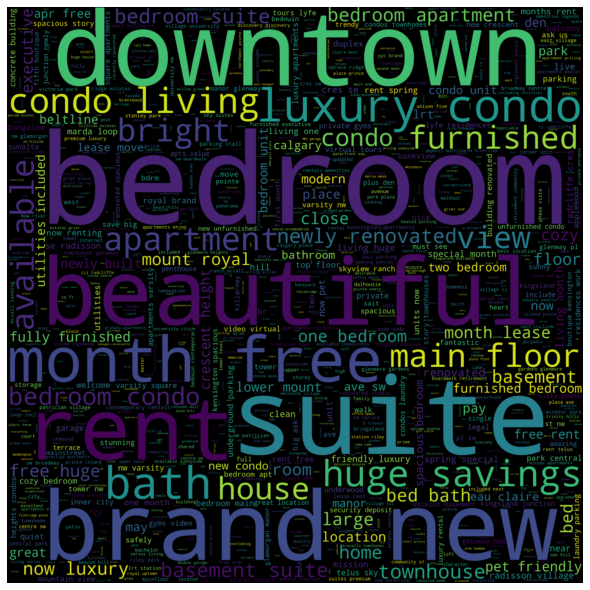

In [126]:
Display_WordCloud(df_written['Listings_Title'])

Landlords are trying to lure potential tenants via the listing title by saying listing is 'brand new' or 'newly renovated', some of the features are 'free' and there are 'huge savings'. The landlords also frequently mention how it is a 'beautiful' place close to all the buzz in 'downtown'.

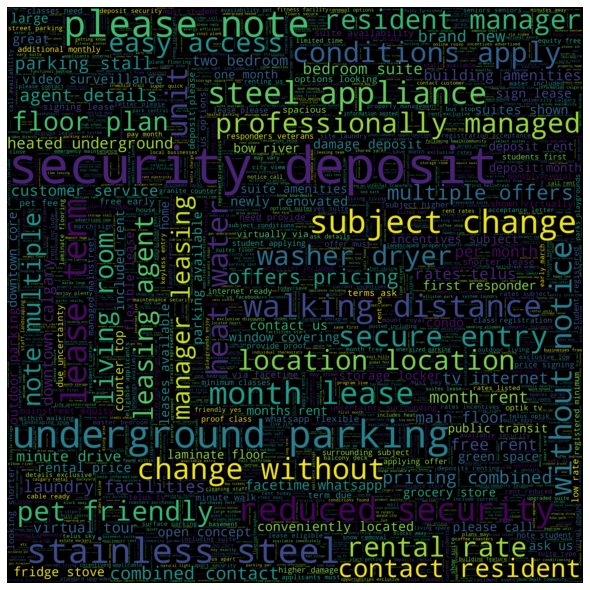

In [127]:
Display_WordCloud(df_written['Fulldescription'].astype(str))

In the full description landlords are taking about 'security deposit','rental rate' and 'leasing' (i.e. all the formalities). They are also listing out the features like 'professionally managed', having 'steel appliances'/'washer'/'dryer' and being the prime 'location' within 'walking distance' of amenities.   